In [1]:
# Model design
import agentpy as ap

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import random

In [2]:
class RoomModel(ap.Model):
    
    def setup(self):
        
        #Create agents(floors)
        n_floors=int(self.p.size**2)
        self.floors = ap.AgentList(self,n_floors)
        
        #Create agents(cleaners)
        n_cleaners=int(self.p.cleaners)
        self.cleaners = ap.AgentList(self,n_cleaners)
        
    
        self.room = ap.Grid(self, [self.p.size]*2, track_empty=True)
        self.room.add_agents(self.floors,random=True,empty=True)
        self.room.add_agents(self.cleaners,positions=0,random=False,empty=False)
        
        
        
        
        #initiate a dynamic variable for all floors
        #Condition 0:clean 1:unclean 2:cleaner
        self.floors.condition=0
        self.cleaners.condition=2
        
        #unclean tiles
        counter=int(self.p.unclean*(self.p.size**2))
        for tile in self.floors:
            tile.condition=1
            counter=counter-1
            if counter<=0:
                break
        
        for cleaner in self.cleaners:
            self.room.move_to(cleaner,[0,0])
        
    def step(self):
        
        
        
        #move cleaners
        for cleaner in self.cleaners:
            for neighbor in self.room.neighbors(cleaner,0):
                if neighbor.condition==1:
                    neighbor.condition=0
                    break
            else:
                xpos=random.randint(-1,1)
                ypos=random.randint(-1,1)
                self.room.move_by(cleaner,[ypos,xpos])
                
        unclean_tiles=self.floors.select(self.floors.condition == 1)
        
        if len(unclean_tiles)==0:
            self.stop()
    
    def end(self):
        
        # Document a measure at the end of the simulation
        clean_tiles = len(self.floors.select(self.floors.condition == 0))
        self.report('Percentage of clean tiles',
                    clean_tiles / len(self.floors))
        self.report('Cleaners',len(self.cleaners))

In [3]:
# Define parameters

parameters = {
    'unclean': float(input()), # Percentage of grid covered by trees
    'size': int(input()), # Height and length of the grid
    'steps': int(input()),
    'cleaners': int(input())
}

.6
10
100
10


In [4]:
# Create single-run animation with custom colors

def animation_plot(model, ax):
    attr_grid = model.room.attr_grid('condition')
    color_dict = {0:'#FFFFFF', 1:'#c29365', 2:'#000000'}
    ap.gridplot(attr_grid, ax=ax, color_dict=color_dict, convert=True)
    ax.set_title(f"Simulation of a Room Cleaning\n"
                f"Time-step: {model.t}, Unclean tiles left: "
                f"{len(model.floors.select(model.floors.condition==1))}")

fig, ax = plt.subplots()
model = RoomModel(parameters)
animation = ap.animate(model, fig, ax, animation_plot)
IPython.display.HTML(animation.to_jshtml(fps=10))

In [15]:
# Prepare parameter sample/*
parameters = {
    'unclean': ap.Range(0.2, 0.8),
    'size': int(input()),
    'cleaners': int(input()),
    'steps': int(input())
}
sample = ap.Sample(parameters, n=30)

10
10
100


In [ ]:
# # Perform experiment
exp = ap.Experiment(RoomModel, sample, iterations=30)
results = exp.run()

Scheduled runs: 900
Completed: 320, estimated time remaining: 0:00:18

In [13]:
# # Save and load data
results.save()
results = ap.DataDict.load('RoomModel')

Data saved to ap_output/RoomModel_4
Loading from directory ap_output/RoomModel_4/
Loading info.json - Successful
Loading parameters_constants.json - Successful
Loading parameters_log.json - Successful
Loading parameters_sample.csv - Successful
Loading reporters.csv - Successful


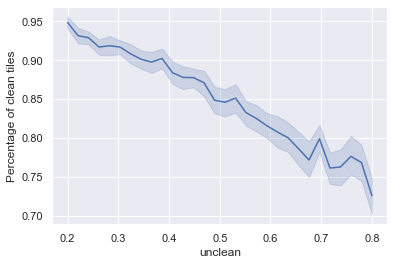

In [14]:
# # Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='unclean',
    y='Percentage of clean tiles'
);